# Simple ML introducion

Written by:
- Manuel Szewc (School of Physics, University of Cincinnati)
- Philip Ilten (School of Physics, University of Cincinnati)
$\renewcommand{\gtrsim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{>}{\sim}$\hspace{1mm}}}\renewcommand{\lessim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{<}{\sim}$\hspace{1mm}}}\renewcommand{\as}{\alpha_{\mathrm{s}}}\renewcommand{\aem}{\alpha_{\mathrm{em}}}\renewcommand{\kT}{k_{\perp}}\renewcommand{\pT}{p_{\perp}}\renewcommand{\pTs}{p^2_{\perp}}\renewcommand{\pTe}{\p_{\perp\mrm{evol}}}\renewcommand{\pTse}{\p^2_{\perp\mrm{evol}}}\renewcommand{\pTmin}{p_{\perp\mathrm{min}}}\renewcommand{\pTsmim}{p^2_{\perp\mathrm{min}}}\renewcommand{\pTmax}{p_{\perp\mathrm{max}}}\renewcommand{\pTsmax}{p^2_{\perp\mathrm{max}}}\renewcommand{\pTL}{p_{\perp\mathrm{L}}}\renewcommand{\pTD}{p_{\perp\mathrm{D}}}\renewcommand{\pTA}{p_{\perp\mathrm{A}}}\renewcommand{\pTsL}{p^2_{\perp\mathrm{L}}}\renewcommand{\pTsD}{p^2_{\perp\mathrm{D}}}\renewcommand{\pTsA}{p^2_{\perp\mathrm{A}}}\renewcommand{\pTo}{p_{\perp 0}}\renewcommand{\shat}{\hat{s}}\renewcommand{\a}{{\mathrm a}}\renewcommand{\b}{{\mathrm b}}\renewcommand{\c}{{\mathrm c}}\renewcommand{\d}{{\mathrm d}}\renewcommand{\e}{{\mathrm e}}\renewcommand{\f}{{\mathrm f}}\renewcommand{\g}{{\mathrm g}}\renewcommand{\hrm}{{\mathrm h}}\renewcommand{\lrm}{{\mathrm l}}\renewcommand{\n}{{\mathrm n}}\renewcommand{\p}{{\mathrm p}}\renewcommand{\q}{{\mathrm q}}\renewcommand{\s}{{\mathrm s}}\renewcommand{\t}{{\mathrm t}}\renewcommand{\u}{{\mathrm u}}\renewcommand{\A}{{\mathrm A}}\renewcommand{\B}{{\mathrm B}}\renewcommand{\D}{{\mathrm D}}\renewcommand{\F}{{\mathrm F}}\renewcommand{\H}{{\mathrm H}}\renewcommand{\J}{{\mathrm J}}\renewcommand{\K}{{\mathrm K}}\renewcommand{\L}{{\mathrm L}}\renewcommand{\Q}{{\mathrm Q}}\renewcommand{\R}{{\mathrm R}}\renewcommand{\T}{{\mathrm T}}\renewcommand{\W}{{\mathrm W}}\renewcommand{\Z}{{\mathrm Z}}\renewcommand{\bbar}{\overline{\mathrm b}}\renewcommand{\cbar}{\overline{\mathrm c}}\renewcommand{\dbar}{\overline{\mathrm d}}\renewcommand{\fbar}{\overline{\mathrm f}}\renewcommand{\pbar}{\overline{\mathrm p}}\renewcommand{\qbar}{\overline{\mathrm q}}\renewcommand{\rbar}{\overline{\mathrm{r}}}\renewcommand{\sbar}{\overline{\mathrm s}}\renewcommand{\tbar}{\overline{\mathrm t}}\renewcommand{\ubar}{\overline{\mathrm u}}\renewcommand{\Bbar}{\overline{\mathrm B}}\renewcommand{\Fbar}{\overline{\mathrm F}}\renewcommand{\Qbar}{\overline{\mathrm Q}}\renewcommand{\tms}{{t_{\mathrm{\tiny MS}}}}\renewcommand{\Oas}[1]{{\mathcal{O}\left(\as^{#1}\right)}}$

This notebook wants to implement simple Machine Learning algorithms for unsupervised tasks. These include clustering, density estimation and dimensionality reduction.

In [1]:
import os

# To generate data and handle arrays
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

## Clustering

Clustering seeks to define groups or **clusters** in such a way that a dataset can be meaningfully segmented. Existing or new elements are assigned to a given cluster due to its **affinity** to said cluster. This is useful for:stancia una dada *afinidad* con cada grupo. Esto es extremadamente útil para:

* Data segmentation (we can consider subsets of the data based on the cluster assignments)
* Dimensionality reduction (we can work with the cluster characteristics, or define a reduce space based in cluster affinities).
* Anomaly detection / outliers
* Efficient searches over dataset elements
* etc.

The most common clustering technique is **K-Means**, which groups the data in $K$ clusters based on the distances to the cluster **centroids**. The centroids are learned via optimization.

The **K-Means** algorithm works as follows:

1. We select the number of clusters $K$
2. We initiliaze the cluster centroids at random.
2. We label each datapoint as beloning to the nearest cluster (defined in terms of the distance to the centroid, which is the affinity to the cluster)
3. We update the centroid as the mean of all datapoints belonging to said cluster.
4. Steps 2 and 3 are repeated until convergence in centroid is reached.

Additionally, due to its dependence on random initialization, the algorithm can be repeated with different initializations and we select the best overall.

K-Means is guaranteed to converge in a finite number of steps (which may be long). However, one should keep in mind that **convergence does not imply correctness**.

Let's use a toy dataset and code a K-Means algorithm

In [2]:
from sklearn.datasets import make_blobs

gt_center = np.array([[3.0, 3.0], [-3.0, -3.0], [-3.0, 3.0], [3.0, -3.0]])
X, t = make_blobs(
    1000,
    n_features=2,
    centers=gt_center,
    cluster_std=1.0,
    random_state=1234,
)

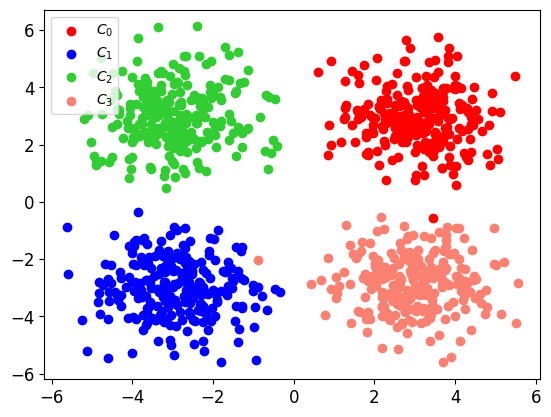

In [3]:
plt.scatter(X[t == 0, 0], X[t == 0, 1], c="red", label="$C_{0}$")
plt.scatter(X[t == 1, 0], X[t == 1, 1], c="blue", label="$C_{1}$")
plt.scatter(X[t == 2, 0], X[t == 2, 1], c="limegreen", label="$C_{2}$")
plt.scatter(X[t == 3, 0], X[t == 3, 1], c="salmon", label="$C_{3}$")

plt.legend(loc="upper left")

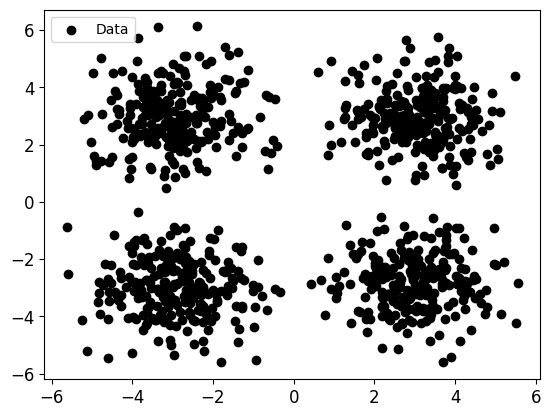

In [4]:
plt.scatter(X[:, 0], X[:, 1], c="black", label="Data")

plt.legend(loc="upper left")

In [5]:
class KMeansClustering:
    def __init__(self, nclasses=2, ndim=2, scale_init=5, mean_init=0, seed=42):
        np.random.seed(seed)
        self.nclasses = nclasses
        self.ndim = ndim
        self.means = mean_init + scale_init * np.random.randn(nclasses, ndim)

    def fit(self, X, nepochs=10, min_change=0.01):
        for nepoch in range(nepochs):
            indexes = self.class_assigner(X)
            for nclass in range(self.nclasses):
                self.means[nclass] = np.sum(X[indexes == nclass], 0) / np.sum(
                    indexes == nclass
                )
        return self

    def class_assigner(self, X):
        distances = np.sum((X[:, np.newaxis] - self.means[np.newaxis]) ** 2, 2)
        indexes = np.argmin(distances, 1)
        return indexes

In [6]:
clusterer = KMeansClustering(nclasses=4, seed=42)
clusterer.fit(X)
labels = clusterer.class_assigner(X)

We see how the cluster assignment is good (in this case, visual inspection is enough).

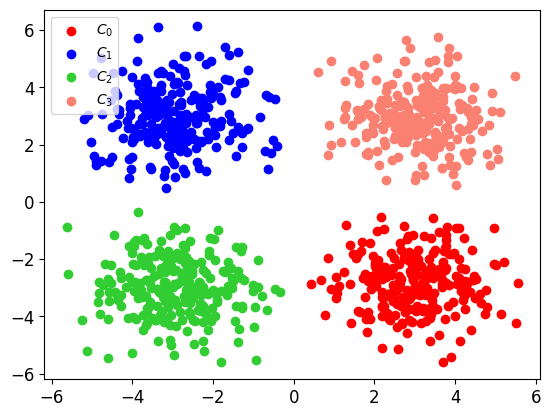

In [7]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], c="red", label="$C_{0}$")
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], c="blue", label="$C_{1}$")
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], c="limegreen", label="$C_{2}$")
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], c="salmon", label="$C_{3}$")

plt.legend(loc="upper left")

### Optimal number of clusters

In the previous example, visual inspection was good enough. However, in general this is not the case (and this why we want to use these unsupervised problems). Thus, we need a method to select the optimal number of clusters.

One possibility is to use the inertia of the model as a way to select the optimal number of clusters. The inertia is simply the sum of the distances between each point and its assigned centroid:

$$I = \sum_{n=1}^{N}|\vec{x}_{n}-\vec{\mu}_{k_n}|^{2}$$

We look for an elbow or inflexion point, where the inertia saturates.

In [8]:
def inertia(X, clusterer):
    ### All point-centroid distances
    distances = np.sum((X[:, np.newaxis] - clusterer.means[np.newaxis]) ** 2, 2)
    ### Sum the minimum distance for each point
    return np.sum(np.min(distances, 1))

In [9]:
kmeans_per_k = [KMeansClustering(nclasses=k).fit(X)
                for k in range(1, 10)]
inertias = [inertia(X, model) for model in kmeans_per_k]

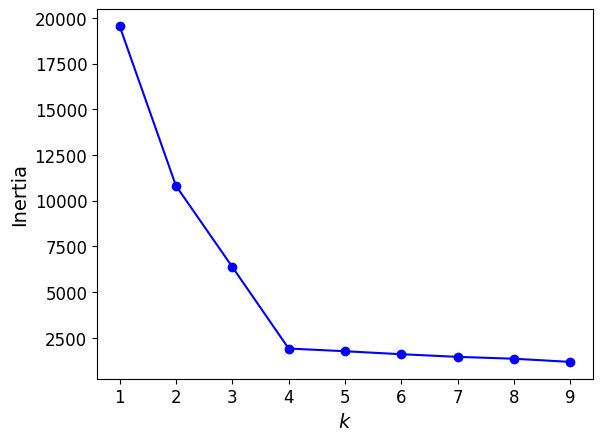

In [10]:
plt.plot(range(1, 10), inertias, "bo-")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.show()

The inflexion point favours 4 or 5 clusters.

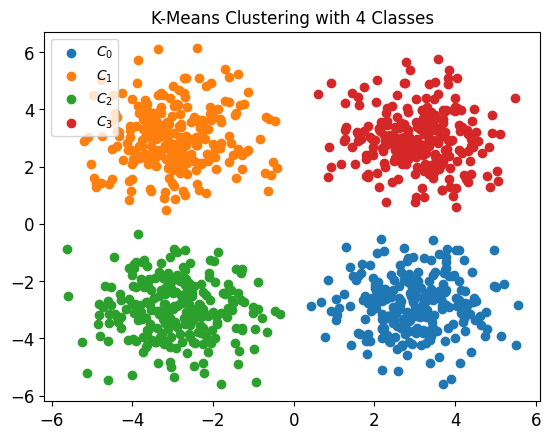

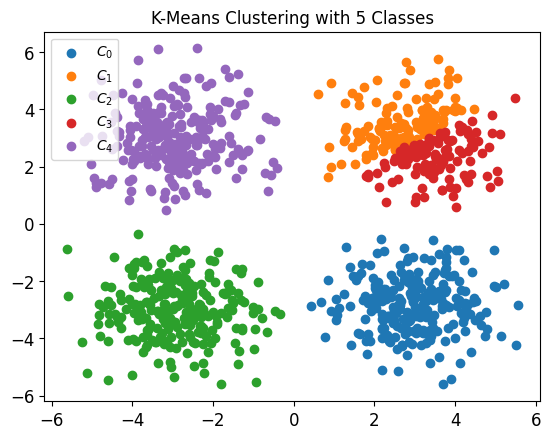

In [26]:
labels = kmeans_per_k[3].class_assigner(X)

for nlabel in np.unique(labels):
    plt.scatter(X[labels == nlabel, 0], X[labels == nlabel, 1], label=f"$C_{nlabel}$")
    
plt.legend(loc="upper left")
plt.title("K-Means Clustering with 4 Classes")
plt.show()

labels = kmeans_per_k[4].class_assigner(X)
for nlabel in np.unique(labels):
    plt.scatter(X[labels == nlabel, 0], X[labels == nlabel, 1], label=f"$C_{nlabel}$")
plt.legend(loc="upper left")
plt.title("K-Means Clustering with 5 Classes")
plt.show()

Another approach is to look at the *silhouette score*, which is the mean silhouette coefficient over all the instances. 

An instance's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and $b$ is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). 

The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

(1000, 1000)
132
(1000, 4)


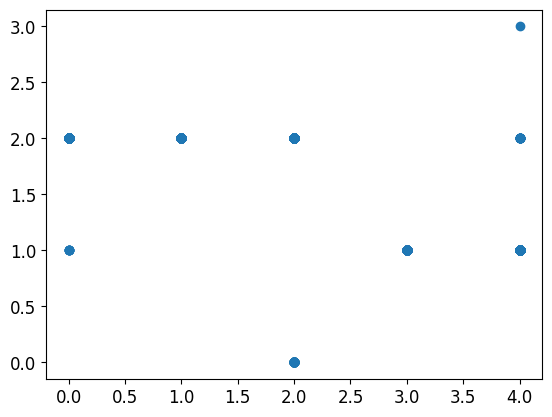

In [105]:
distances = np.sum((X[:, np.newaxis] - X[np.newaxis]) ** 2, 2)
print(distances.shape)
distances[0][labels == labels[0]].shape
n = 0
print(np.sum(labels==labels[n]))
cluster_distances = np.array([np.sum(np.sum((X[:, np.newaxis] - X[labels==nclass][np.newaxis]) ** 2, 2),1) for nclass in range(np.max(labels))]).T
print(cluster_distances.shape)
plt.scatter(labels,[np.argmin(cluster_distances[n,np.arange(np.max(labels)) != labels[n]]) for n in range(len(labels))])

In [144]:
def silhouette_score(X, clusterer):
    labels = clusterer.class_assigner(X)
    n_samples = X.shape[0]
    n_classes = clusterer.nclasses
    ### all pairwise squared distances
    distances = np.sum((X[:, np.newaxis] - X[np.newaxis]) ** 2, 2)
    ### mean distance to points in the same cluster, I need to remove the point itself from the distances
    a= np.array([np.mean(np.delete(distances[n],n)[(labels[np.delete(np.arange(len(X)),n)]==labels[n])]) for n in range(n_samples)])
    ### mean distance to points in the nearest cluster
    cluster_distances = np.array([np.mean(np.sum((X[:, np.newaxis] - X[labels==nclass][np.newaxis]) ** 2, 2),1) for nclass in range(n_classes)]).T
    b = np.array([np.min(cluster_distances[n,np.arange(n_classes) != labels[n]]) for n in range(n_samples)])
    return np.mean(((b - a) / np.max(np.vstack([a, b]),0)))

In [145]:
silhouette_scores = [silhouette_score(X, model) for model in kmeans_per_k[1:]]

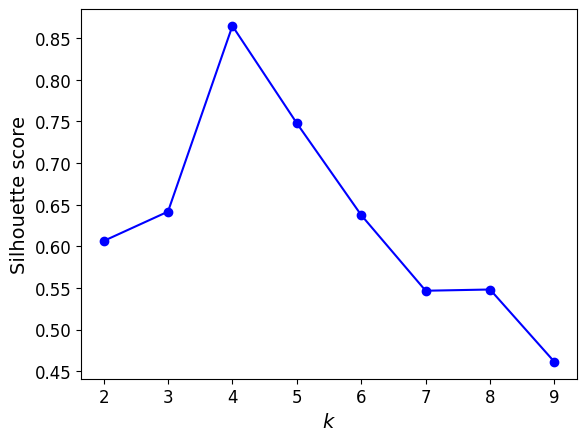

In [146]:
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

We see how there is a more unambiguous maximum for K=4.

#### Jet Clustering

## Density Estimation

Clustering is based in hard assignments, and usually relies on defining centroids and affinities to those centroids.

We can extend this approach with more assumptions, to try and learn the density of the data. This usually amounts to specifying a likelihood function $p(X|\theta)$ which could be parametric or non-parametric in nature, and then learning the appropriate parameters through a **Maximum-Likelihood** approach. 

Density estimation increases the interpretability of the models and allows for more robust and powerful data segmentation, outlier detection, etc. However, it is usually more costly and we risk biasing the problem. Additionally, densities also allow for **data generation** which is specially useful for Monte Carlo surrogate models.


A particularly simple example is the case of a **Gaussian Mixture Model**. Mixture models propose to describe each datapoint as sampled from a mixture of base distributions

$$p(X|\theta)=\prod_{n=1}^{N}p(x_{n}|\theta)$$

$$p(x|\theta)=\sum_{k=1}^{K}\pi_{k}p(x|k)$$

where $\pi_{k}$ are the class fractions. We can introduce the latent variables $z_{n}$ which encode the class asignment for instance $n$

$$p(x|\theta)=\sum_{k=1}^{K}p(x,z=k|\theta)=\sum_{k}p(z=k|\theta)p(x|\theta,z=k)$$

where $p(z=k|\theta)=\pi_{k}$. The usefulness of introducing a latent variable is we can study the conditional probability of a measurement belonging to class $k$

$$p(z=k|x,\theta)=\frac{p(x,z=k|\theta)}{p(x|\theta)}=\frac{\pi_{k}p(x|k)}{\sum_{q=1}^{K}\pi_{q}p(x|q)}$$

which are sometimes called the responsabilities. This a particularly nice feature of probabilistic models. Instead of a **hard-assignment** as in clustering, we can also study **soft-assignments** where we assign a probability of belonging to a certain class.

In practice, finding the Maximum-Likelihood values of the parameters is not trivial and numerical solutions can be used. However, mixture models still allow for a particular type of algorithm called **Expectation-Maximization** (EM) that guarantees convergence to a local maximum (not a global one).

The EM algorithm takes advantage of the latent (that is, unseen) local variables to divide the likelihood maximization in two steps.

1. We initialize at random the parameters $\theta_{0}$, where $\theta$ includes the class fractions and all the parameters of the per class distribution.
2. We compute the per-class responsabilities for each datapoint
$$p(z_{n}|\theta_{0})$$
This is the expectation step.

3. We update the values of $\theta$ by maximizing the log-likelihood 
$$\sum_{n=1}^{N}\sum_{k=1}^{K}p(z_{n}|\theta_{0}) \ln p(x_{n}|k)$$
which is now a convex function. This is the maximization step.

4. We repeat steps 2 and 3 until convergence is achieved in terms of changes in the likelihood


For gaussian mixtures we have 
$$p(x|k)=\mathcal{N}(x,\mu_{k},\Sigma_{k})$$
where $\mu_{k}$ and $\Sigma_{k}$ are the per-class mean and covariance matrices respectively.

In this case, and many others, the EM algorithm yields a closed form solution for the updates. You can work out the math yourself but we have an implementation below:

In [11]:
from sklearn.datasets import make_blobs

gt_center = np.array([[3.0, 3.0], [-3.0, -3.0], [-3.0, 3.0], [3.0, -3.0]])
X, t = make_blobs(
    1000,
    n_features=2,
    centers=gt_center,
    cluster_std=1.0,
    random_state=1234,
)

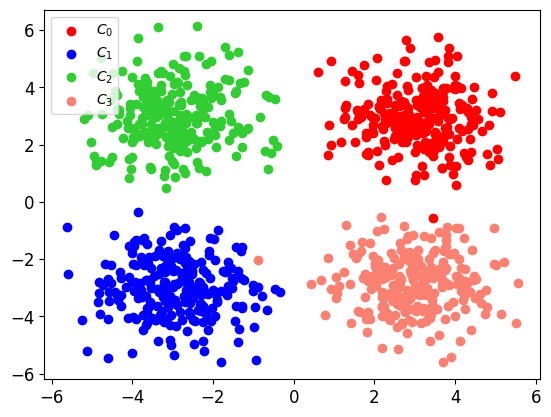

In [12]:
plt.scatter(X[t == 0, 0], X[t == 0, 1], c="red", label="$C_{0}$")
plt.scatter(X[t == 1, 0], X[t == 1, 1], c="blue", label="$C_{1}$")
plt.scatter(X[t == 2, 0], X[t == 2, 1], c="limegreen", label="$C_{2}$")
plt.scatter(X[t == 3, 0], X[t == 3, 1], c="salmon", label="$C_{3}$")

plt.legend(loc="upper left")

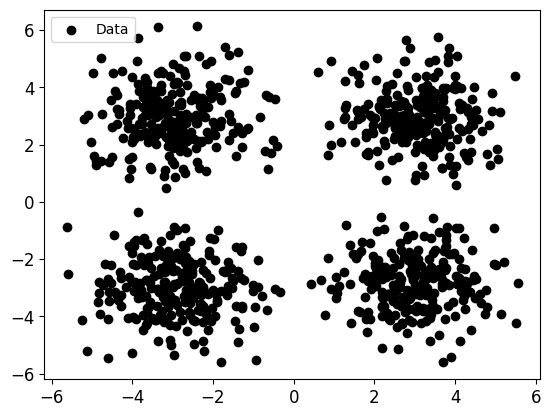

In [13]:
plt.scatter(X[:, 0], X[:, 1], c="black", label="Data")

plt.legend(loc="upper left")

In [14]:
class GaussianMixtureModel:
    def __init__(
        self, nclasses=2, ndim=2, scale_init=5, mean_init=0, epsilon=1e-10, seed=42
    ):
        np.random.seed(seed)
        self.nclasses = nclasses
        self.ndim = ndim
        self.w = np.ones(self.nclasses) / self.nclasses
        self.means = mean_init + scale_init * np.random.randn(nclasses, ndim)
        self.covs = np.array([np.eye(self.ndim) for _ in range(self.nclasses)])
        self.precision_matrix = np.array(
            [np.eye(self.ndim) for _ in range(self.nclasses)]
        )
        self.epsilon = epsilon * np.array(
            [np.eye(self.ndim) for _ in range(self.nclasses)]
        )

    def fit(self, X, nepochs=10, min_change=0.01):
        log_likelihood = self.log_likelihood(X)
        for nepoch in range(nepochs):
            probas = self.E_step(X)
            self.M_step(X, probas)
            self.precision_matrix = np.linalg.inv(self.covs + self.epsilon)
            log_likelihood_new = self.log_likelihood(X)
            # if log_likelihood_new < (1.0+min_change)*log_likelihood:
            #     break
            log_likelihood = log_likelihood_new
        # print(nepoch)
        return self

    def predict_proba(self, X):
        ### get likelihoods
        likelihood = self.gaussian_likelihood(X)
        ### reweight using weights
        weighted_likelihood = np.einsum("nk, k -> nk", likelihood, self.w)
        ### normalize
        probas = np.einsum(
            "nk,n -> nk", weighted_likelihood, 1 / np.sum(weighted_likelihood, 1)
        )
        return probas

    def predict(self, X):
        ### get likelihoods
        likelihood = self.gaussian_likelihood(X)
        ### reweight using weights
        weighted_likelihood = np.einsum("nk, k -> nk", likelihood, self.w)
        ### normalize
        probas = np.einsum(
            "nk,n -> nk", weighted_likelihood, 1 / np.sum(weighted_likelihood, 1)
        )
        return np.argmin(probas, 1)

    def gaussian_likelihood(self, X):
        ### distance vector is NxKxD
        distance_vector = X[:, np.newaxis] - self.means[np.newaxis]
        ### weighted distance for denominator, now it's NxK
        weighted_distance = np.einsum(
            "nki, kij, nkj -> nk",
            distance_vector,
            self.precision_matrix,
            distance_vector,
        )
        ### likelihood per event per class
        likelihood = np.einsum(
            "k,nk -> nk",
            (np.power(2 * np.pi, -self.ndim / 2))
            * (1.0 / np.sqrt(np.linalg.det(self.covs))),
            np.exp(-0.5 * weighted_distance),
        )
        return likelihood

    def E_step(self, X):
        probas = self.predict_proba(X)
        return probas

    def M_step(self, X, probas):
        Nk = np.sum(probas, 0)
        self.w = Nk / len(X)
        self.means = np.einsum("nk, nd, k -> kd", probas, X, 1 / Nk)
        distance_vector = X[:, np.newaxis] - self.means[np.newaxis]
        self.covs = np.einsum(
            "nk, nki, nkj, k -> kij", probas, distance_vector, distance_vector, 1 / Nk
        )
        return self

    def log_likelihood(self, X):
        ### get likelihoods
        likelihood = self.gaussian_likelihood(X)
        ### reweight using weights
        weighted_likelihood = np.einsum("nk, k -> nk", likelihood, self.w)
        return np.sum(np.log(np.sum(weighted_likelihood, 1)))

We can initialize the model

In [15]:
gmm = GaussianMixtureModel(nclasses=4, ndim=2, seed=156)

And inspect the initial values

In [16]:
gmm.means.shape, gmm.covs.shape

((4, 2), (4, 2, 2))

And class predictions (this is a hard assignment, you can get the soft-assignment with `predict_proba`)

In [17]:
gmm.predict(X)

array([0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 3, 0,
       0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2,
       0, 2, 2, 1, 3, 1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 3, 0, 2, 0, 0, 0, 1, 0, 2, 0,
       2, 2, 2, 2, 3, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [18]:
gmm.log_likelihood(X)

-9851.561006598913

We fit fro some epochs

In [19]:
gmm.fit(X, nepochs=100, min_change=1)

And we get the updated parameters

In [21]:
gmm.w

array([0.02681068, 0.50072355, 0.22337231, 0.24909345])

In [22]:
gmm.means

array([[ 2.44231802, -3.11573824],
       [-2.95089112, -0.00655364],
       [ 3.03815915, -2.79447954],
       [ 3.05809789,  2.9717204 ]])

In [23]:
gmm.covs[0]

array([[ 0.37627211, -0.61557352],
       [-0.61557352,  1.12362035]])

In [24]:
gmm.precision_matrix[0]

array([[25.62053848, 14.03616895],
       [14.03616895,  8.57967189]])

In [25]:
probas = gmm.predict_proba(X)
labels = np.argmin(probas, 1)

We can check the predicted classes

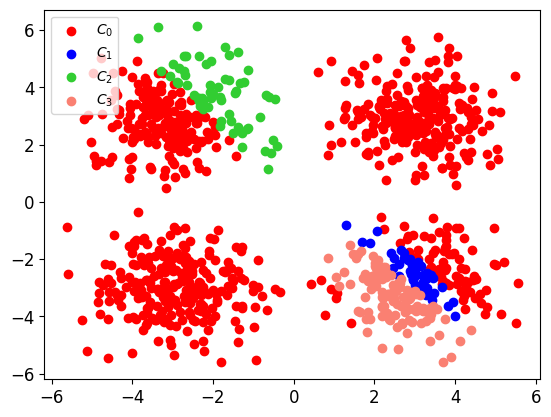

In [26]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], c="red", label="$C_{0}$")
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], c="blue", label="$C_{1}$")
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], c="limegreen", label="$C_{2}$")
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], c="salmon", label="$C_{3}$")

plt.legend(loc="upper left")

As in K-Means, but even more, we observe a lot of seed dependence (again, we converge to a local minimum). Thus, we have to scan over possible initializations and choose the best option (which is the one that maximizes the likelihood).

In [27]:
nmodels = 100
log_likelihoods = np.zeros(nmodels)
seeds = np.zeros(nmodels)
nmodel = 0
nmodel_accepted = 0
while nmodel_accepted < nmodels:
    gmm = GaussianMixtureModel(nclasses=4, ndim=2, seed=nmodel)
    gmm.fit(X, nepochs=100)
    log_likelihood = gmm.log_likelihood(X)
    if np.isnan(log_likelihood) == False:
        log_likelihoods[nmodel_accepted] = log_likelihood
        seeds[nmodel_accepted] = nmodel
        nmodel_accepted += 1
        nmodel += 1
    else:
        nmodel += 1

/tmp/ipykernel_7520/2187790850.py:67: RuntimeWarning: divide by zero encountered in divide
  * (1.0 / np.sqrt(np.linalg.det(self.covs))),
/home/mszewc/.local/lib/python3.10/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/tmp/ipykernel_7520/2187790850.py:67: RuntimeWarning: invalid value encountered in sqrt
  * (1.0 / np.sqrt(np.linalg.det(self.covs))),


In [28]:
np.isnan(log_likelihoods[0])

False

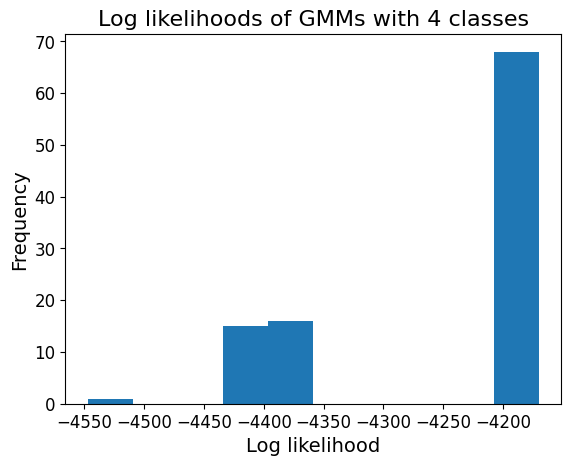

In [34]:
plt.hist(log_likelihoods)
plt.xlabel("Log likelihood", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Log likelihoods of GMMs with 4 classes", fontsize=16)
plt.show()

In [30]:
np.argmax(log_likelihoods)

0

We get the best model

In [31]:
best_model = GaussianMixtureModel(
    nclasses=4, ndim=2, seed=int(seeds[np.argmax(log_likelihoods)])
)
best_model.fit(X, nepochs=100)

In [32]:
best_model.w, best_model.means, best_model.covs

(array([0.24993551, 0.2501922 , 0.25085067, 0.24902161]),
 array([[ 2.97754719, -2.82836043],
        [-2.97164716,  3.00987586],
        [-2.92661263, -3.01743046],
        [ 3.05886396,  2.97160878]]),
 array([[[ 0.90949568,  0.00462763],
         [ 0.00462763,  0.9081273 ]],
 
        [[ 0.94941871,  0.04034079],
         [ 0.04034079,  1.11561005]],
 
        [[ 0.9997179 , -0.05429475],
         [-0.05429475,  0.95783466]],
 
        [[ 0.84129669, -0.04968167],
         [-0.04968167,  0.95664935]]]))

In [35]:
probas = best_model.predict_proba(X)
labels = np.argmin(probas, 1)

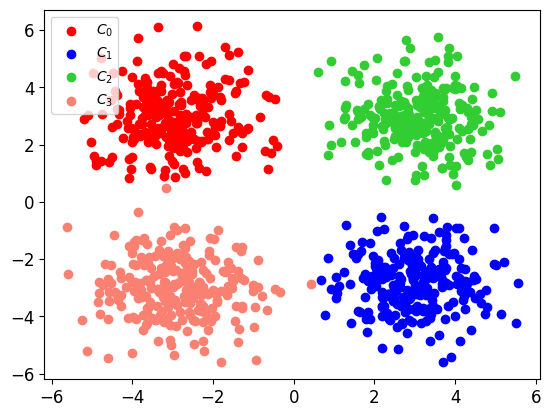

In [36]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], c="red", label="$C_{0}$")
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], c="blue", label="$C_{1}$")
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], c="limegreen", label="$C_{2}$")
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], c="salmon", label="$C_{3}$")

plt.legend(loc="upper left")

Much better!

We can also plot the learned class-assignment probabilities!

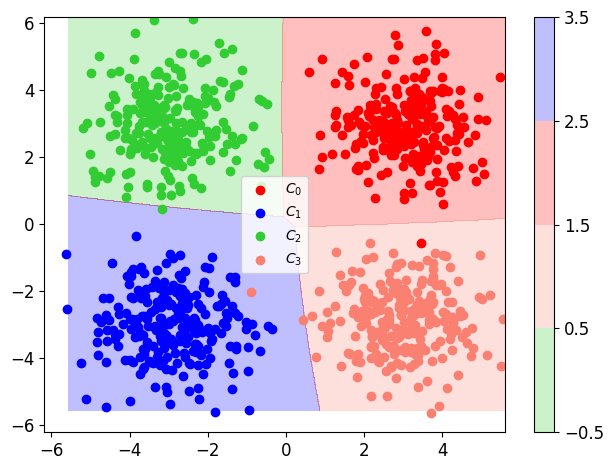

In [37]:
x1vals = np.linspace(0.99 * np.min(X[:, 0]), 1.01 * np.max(X[:, 0]), 1000)
x2vals = np.linspace(0.99 * np.min(X[:, 1]), 1.01 * np.max(X[:, 1]), 1000)
X1, X2 = np.meshgrid(x1vals, x2vals)
Xvals = np.array([X1.ravel(), X2.ravel()]).T
Z = best_model.predict(Xvals).reshape(X1.shape)
plt.contourf(
    X1,
    X2,
    Z,
    colors=["limegreen", "salmon", "red", "blue"],
    levels=[-0.5, 0.5, 1.5, 2.5, 3.5],
    alpha=0.25,
)
plt.colorbar()
plt.scatter(X[t == 0, 0], X[t == 0, 1], c="red", label="$C_{0}$")
plt.scatter(X[t == 1, 0], X[t == 1, 1], c="blue", label="$C_{1}$")
plt.scatter(X[t == 2, 0], X[t == 2, 1], c="limegreen", label="$C_{2}$")
plt.scatter(X[t == 3, 0], X[t == 3, 1], c="salmon", label="$C_{3}$")
plt.tight_layout()
plt.legend(loc="center")

A more powerful example of density estimation using Normalizing flows is found in the `flows` notebook.

## Dimensionality Reduction (`sklearn` based)

This is probably the most popular use of unsupervised techniques (even for supervised tasks!). Working on high-dimensionality spaces can be tough due to a variety of reasons:
* Data is hard to visualize
* Data may take too much storage space (compression)
* Training cost may be too large due to the large number of features
* The models may perform suboptimally since the *curse of dimensionality* implies that for large number of features we need more data. Additionally, we expect most problems to lie in submanifolds of the feature space (this is the *manifold hypothesis*).

Dimensionality reduction seeks to reduce our dataset from a original feature space of size $D$ to a reduced space while retaining as much information as possible. There are two very popular approaches:
* Projection: We project the highly-dimensional space to a lower-dimensional hyperplane, collapsing all orthogonal variables.
* Manifold learning: We learn a lower dimensional manifold a project there.

For the former, probably the most common algorithm is **Principal Component Analysis** (PCA).

### Principal Component Analysis

PCA seeks to find the higher varianze directions in data. It ranks the eigenvectors of the data covariance in terms of their eigenvalues, which are the Principal Components, and projects the data to the first $M$ eigenvectors.

The algorithm is relatively straightforward: we fit an ellipsoid to the data, center and rotate it until we align the data with the ellipsoid's principal axis.

We can see it using a toy example

Text(0, 0.5, '$x_{2}$')

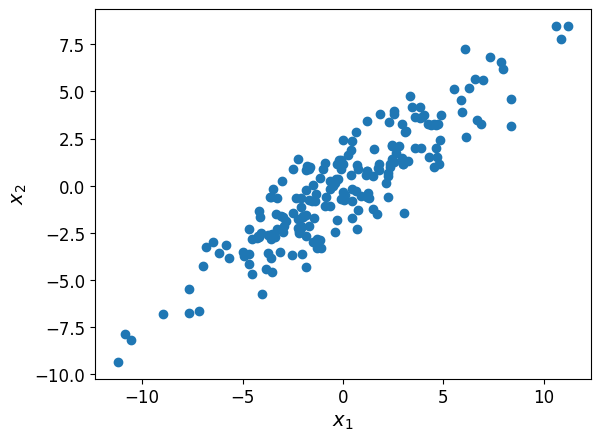

In [40]:
angle = np.pi / 5
stretch = 5 # axis distorsion factor
N = 200 # number of samples
M =  2 # number of dimensions
np.random.seed(3)

# Create N samples of dimension M that follow a Gaussian distribution with mean [0.0,0.0] and identity covariance matrix
X = np.random.randn(N, M) 

# Stretch matrix to distort one axis
S = np.array([[stretch, 0],
              [0, 1]])

# Matrix multiplication
X = X @ S

# Rotation matrix to make it no longer aligned with the axes
R = np.array([[np.cos(angle), np.sin(angle)], 
              [-np.sin(angle), np.cos(angle)]])

X = X @ R

# Plot
plt.scatter(*X.T)
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')

We can project to the two axis. However, the data seems to prefer the diagonal directions. Let's see how it works.

In [41]:
variant_1 = X[:,0] + X[:,1]
variant_2 = X[:,0] - X[:,1]
#are they orthogonal?
print(np.dot([1,1],[1,-1]))

0


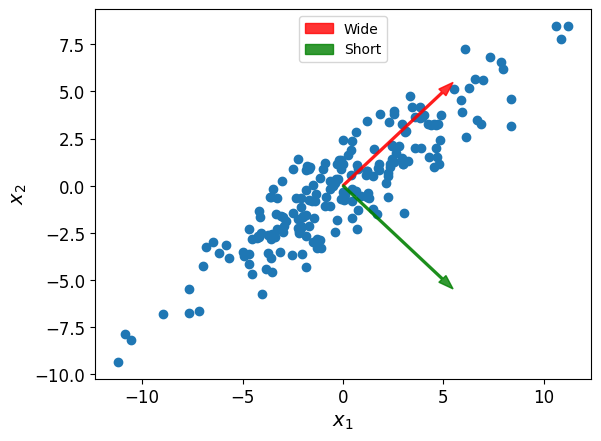

In [42]:
size=7
plt.scatter(*X.T)
plt.arrow(0, 0, (1.0/np.sqrt(2))*size, (1.0/np.sqrt(2))*size, color='red', width=0.1, head_width=0.5, alpha=0.8,
        label='Wide')
plt.arrow(0, 0, (1.0/np.sqrt(2))*size, -(1.0/np.sqrt(2))*size,color='green', width=0.1, head_width=0.5, alpha=0.8,
        label='Short')
plt.legend()
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.legend(loc='upper center')

Let's see the projected values in each direction

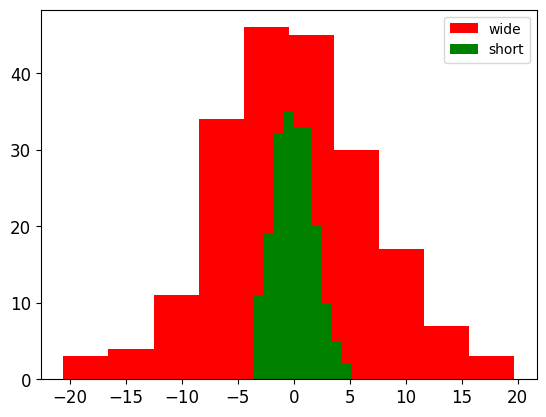

In [43]:
plt.hist(variant_1, color='red', label='wide')
plt.hist(variant_2, color='green', label='short')
plt.legend()

The projection of an $N$-dimensional point in a direction is the coordinate of that point in that direction.

We see how there's a direction where the data is more extended. The PCA insight is that this direction probably has more information of the full-dimensional data. Thus, it's the better option to project.

We can quantify how extended a distribution is in each direction with the covarianze matrix:

In [44]:
print(np.cov(X.T))

[[15.88577342 11.16359392]
 [11.16359392  9.65896387]]


PCA then seeks to diagonalize the covariance matrix with rotations:

In [45]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

In [46]:
print(X.shape, X_pca.shape)

(200, 2) (200, 2)


We can display the chosen axes for data projection using  `components_` , where each row is a component.

In [47]:
pca.components_

array([[-0.79644131, -0.60471583],
       [ 0.60471583, -0.79644131]])

Very similar to our intuitive projection!

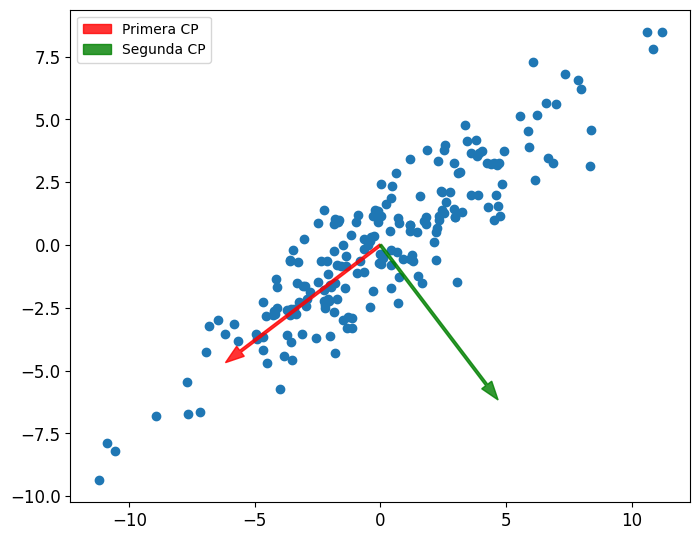

In [48]:
size=7

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(*X.T)

ax.arrow(0, 0, pca.components_[0,0]*size, pca.components_[0,1]*size, color='red', width=0.1, head_width=0.5, alpha=0.8,
        label='Primera CP')
ax.arrow(0, 0, pca.components_[1,0]*size, pca.components_[1,1]*size, color='green', width=0.1, head_width=0.5, alpha=0.8,
        label='Segunda CP')
ax.legend()

ax.set_aspect('equal')

And we can see the covariance matrix in the rotated space:

In [49]:
print(np.cov(X_pca.T).round(2))

[[24.36  0.  ]
 [ 0.    1.18]]


Two observations:
1. The covariance matrix is now diagonal.
2. The coordinates are ordered in terms of decreased variance.

If we now plot the transformed dataset, we have an alligned ellipsoid.

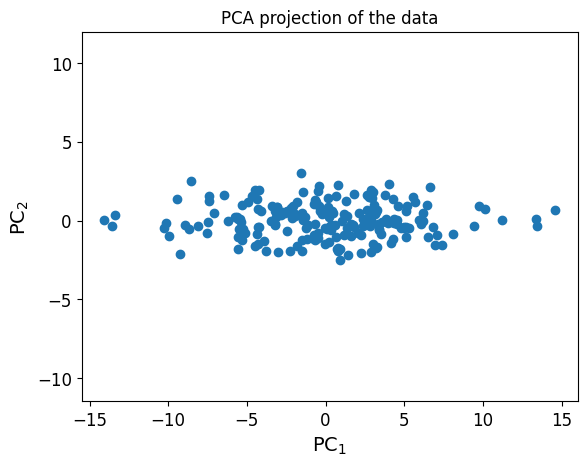

In [52]:
plt.scatter(*X_pca.T)
plt.axis('equal')
plt.xlabel('$\mathrm{PC}_{1}$')
plt.ylabel('$\mathrm{PC}_{2}$')
plt.title('PCA projection of the data')
plt.show()

Since we are simply rotating stuff (not losing any information), we can still invert and recover the original data.

In [53]:
X_2 = pca.inverse_transform(X_pca)

In [54]:
np.allclose(X, X_2)

True

So far, we have not actually reduced the dimensionality, only found a "nicer" basis. To reduce the dimensionality, we need to project and "throw" some features while losing as little information as possible:

In [55]:
X_1d = X_pca.copy()
X_1d[:,1] = 0
X_1d[:10]

array([[-8.96088137,  0.        ],
       [-0.45360336,  0.        ],
       [ 1.38359166,  0.        ],
       [ 0.41631578,  0.        ],
       [ 0.21858374,  0.        ],
       [ 6.53868464,  0.        ],
       [-4.45218566,  0.        ],
       [-0.25210075,  0.        ],
       [ 2.74828447,  0.        ],
       [-4.89804685,  0.        ]])

If we now invert the transformation, we see how the inverted features are not exactly the same. We are losing information.

In [56]:
X_2 = pca.inverse_transform(X_1d)

In [57]:
np.allclose(X, X_2)

False

We can see how the "compressed" data looks:

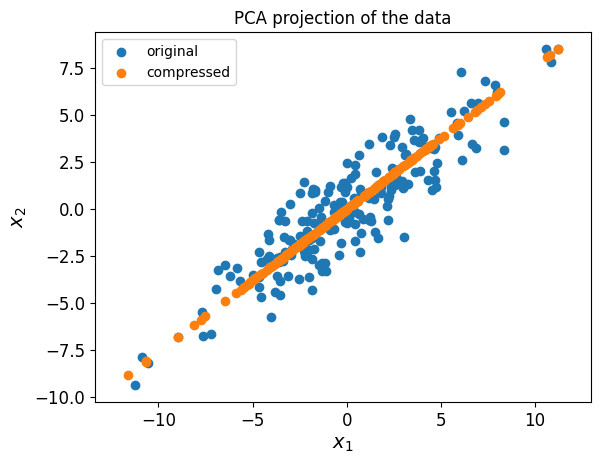

In [59]:
plt.scatter(*X.T, label='original')
plt.scatter(*X_2.T, label='compressed')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.legend()
plt.title('PCA projection of the data')
plt.axis('equal')
plt.show()

We have collapsed the data to a single (very informative) axis.

The covariance matrix is still pretty similar:

In [60]:
print('Original covariance matrix\n', np.cov(X.T))
print('\nCompressed covariance matrix\n', np.cov(X_2.T))

Original covariance matrix
 [[15.88577342 11.16359392]
 [11.16359392  9.65896387]]

Compressed covariance matrix
 [[15.45326169 11.73323372]
 [11.73323372  8.90871948]]


We can quantify this difference through the trace of the covariance matrix:

In [61]:
np.trace(np.cov(X.T))-np.trace(np.cov(X_2.T))

1.1827561207852924

In [62]:
np.trace(np.cov(X_2.T))/np.trace(np.cov(X.T))

0.9536986383059259

This is what's contained in `explained variance`, since it's a rotation invariant:

In [63]:
pca.explained_variance_

array([24.36198117,  1.18275612])

In [64]:
np.cov(X_pca.T).round(8)

array([[24.36198117,  0.        ],
       [ 0.        ,  1.18275612]])

In [65]:
pca.explained_variance_ratio_

array([0.95369864, 0.04630136])

In [66]:
np.allclose(pca.explained_variance_[1], np.trace(np.cov(X.T))-np.trace(np.cov(X_2.T)))

True

Then, for dimensionality reduction we chose to keep the first $M$ components throwing away the $D-M$ components with least information (in so far as variance is concerned).

In `sklearn` we can set this using the parameter `n_components`. We can see this using a nice standard, the Iris dataset:

In [67]:
from sklearn.datasets import load_iris

data = load_iris()
X, t = data['data'], data['target']
names = data['feature_names']
class_names=data['target_names']

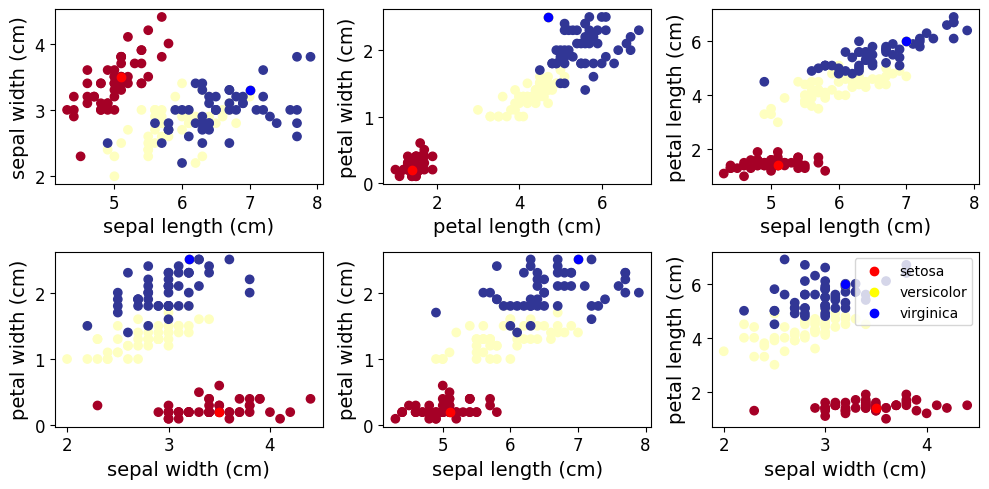

In [68]:
fig, axs = plt.subplots(2,3)

colors=['red','yellow', 'blue']
for ax,(i,j) in zip(axs.flatten(),[(0,1),(2,3),(0,2),(1,3),(0,3), (1,2)]):
    ax.scatter(X[:,i], X[:,j],c=t,cmap=plt.cm.RdYlBu)
    ax.scatter(X[t==0][0,i],X[t==0][0,j],c=colors[0],label=class_names[0])
    ax.scatter(X[t==1][0,i],X[t==2][0,j],c=colors[1],label=class_names[1])
    ax.scatter(X[t==1][0,i],X[t==2][0,j],c=colors[2],label=class_names[2])
    ax.set_xlabel(names[i])
    ax.set_ylabel(names[j])
axs[-1,-1].legend(loc='upper right')
fig.set_size_inches(10,5)
fig.tight_layout()
plt.show()

Although we still can visualize things here, 4 is larger than 2 and things become trickier. 

We can project this to two dimensions:

In [69]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [70]:
X.shape

(150, 4)

In [71]:
X2D.shape

(150, 2)

Now, the observed data looks like this:

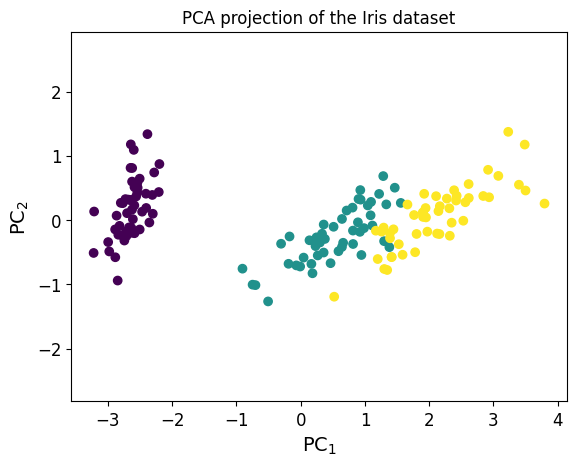

In [73]:
plt.scatter(*X2D.T, c=t)
plt.xlabel('$\mathrm{PC}_1$')
plt.ylabel('$\mathrm{PC}_2$')
plt.title('PCA projection of the Iris dataset')
plt.axis('equal')
plt.show()

In [74]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

We see how the first class is kept apart from the other two. This is very nice, specially keeping in mind that PCA **doesn't know about classes**. Here, dimensionality reduction is helpful.

We can inspect the components to try to understand what's going on:

In [75]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

We can also invert the transformation at the expense of losing information

In [76]:
X4D_inv = pca.inverse_transform(X2D)

In [77]:
np.allclose(X4D_inv, X)

False

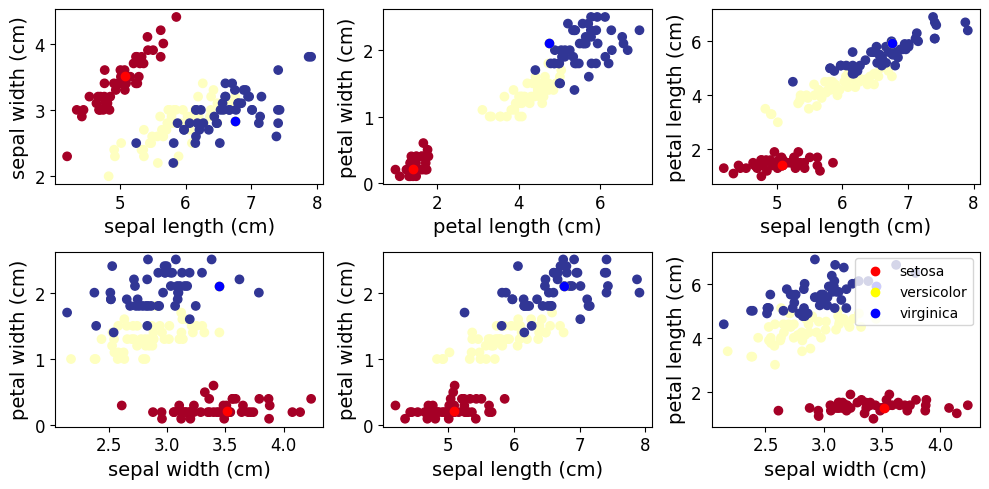

In [78]:
fig, axs = plt.subplots(2,3)

colors=['red','yellow', 'blue']
for ax,(i,j) in zip(axs.flatten(),[(0,1),(2,3),(0,2),(1,3),(0,3), (1,2)]):
    ax.scatter(X4D_inv[:,i], X[:,j],c=t,cmap=plt.cm.RdYlBu)
    ax.scatter(X4D_inv[t==0][0,i],X4D_inv[t==0][0,j],c=colors[0],label=class_names[0])
    ax.scatter(X4D_inv[t==1][0,i],X4D_inv[t==2][0,j],c=colors[1],label=class_names[1])
    ax.scatter(X4D_inv[t==1][0,i],X4D_inv[t==2][0,j],c=colors[2],label=class_names[2])
    ax.set_xlabel(names[i])
    ax.set_ylabel(names[j])
axs[-1,-1].legend(loc='upper right')
fig.set_size_inches(10,5)
fig.tight_layout()
plt.show()

We can also quantify the information loss through the **reconstruction error**:

In [79]:
np.mean(np.sum(np.square(X4D_inv - X), axis=1))

0.10136429572959302

### Swiss Roll

PCA may fail in some cases, where the covariance is not a good proxy for information. Let's see this with a slightly trickier dataset, the `Swiss Roll`

In [80]:
from sklearn.datasets import make_swiss_roll

X, z = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [81]:
print(X.shape,z.shape)

(1000, 3) (1000,)


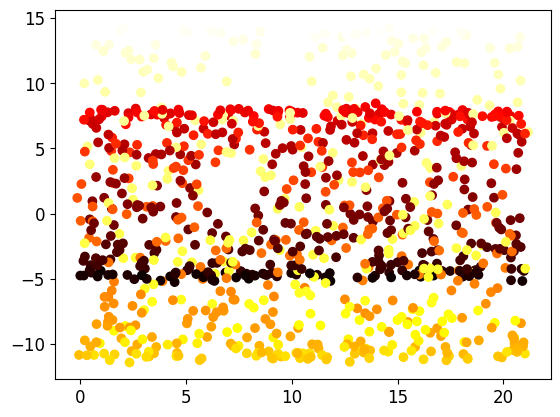

In [82]:
plt.scatter(X[:, 1], X[:, 2], c=z,  cmap=plt.cm.hot)

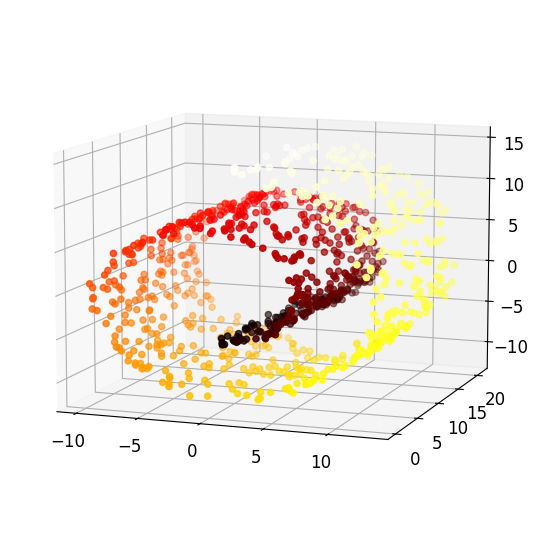

In [83]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=z, cmap=plt.cm.hot)
ax.view_init(10, -70)

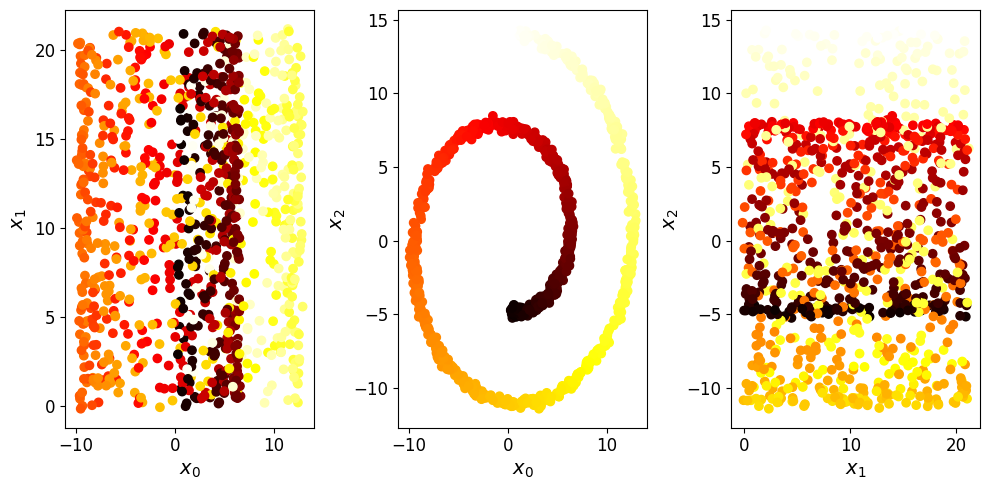

In [84]:
fig, axs = plt.subplots(1,3)

for ax,(i,j) in zip(axs.flatten(),[(0,1),(0,2),(1,2)]):
    ax.scatter(X[:,i], X[:,j],c=z,cmap=plt.cm.hot)
    ax.set_xlabel('$x_{'+str(i)+'}$')
    ax.set_ylabel('$x_{'+str(j)+'}$')
fig.set_size_inches(10,5)
fig.tight_layout()
plt.show()

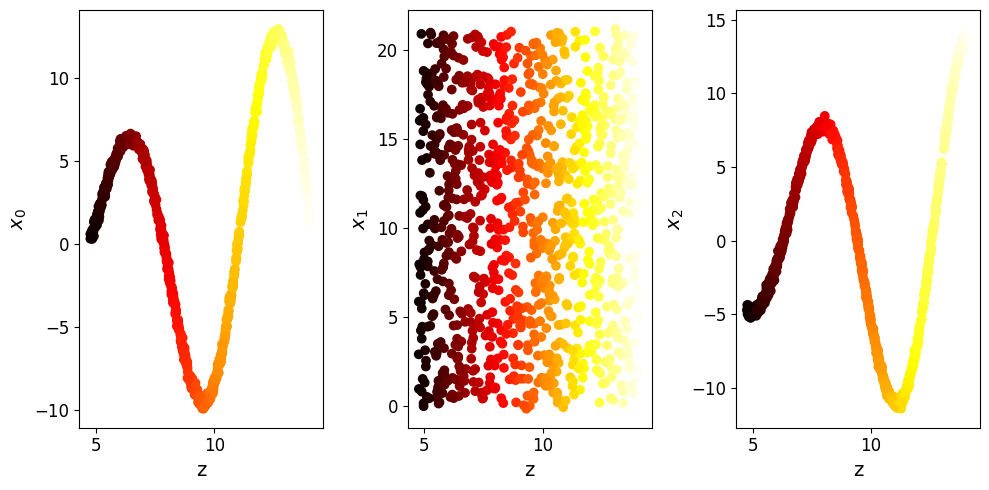

In [85]:
fig, axs = plt.subplots(1,3)

for ax,i in zip(axs.flatten(),[0, 1,2]):
    ax.scatter(z,X[:,i], c=z,  cmap=plt.cm.hot)
    ax.set_ylabel('$x_{'+str(i)+'}$')
    ax.set_xlabel('z')
fig.set_size_inches(10,5)
fig.tight_layout()
plt.show()

The nature of the dataset means that feature relations are not captured by the covariance. Let's see what happens if we apply PCA:

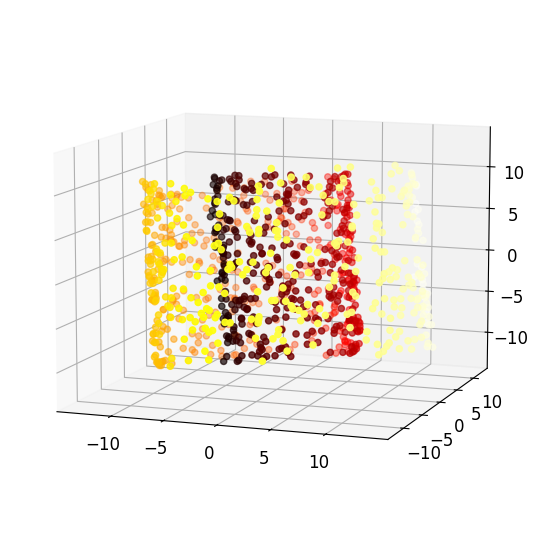

In [87]:
pca = PCA(n_components = 3) 

X_pca=pca.fit_transform(X)

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=z, cmap=plt.cm.hot)
ax.view_init(10, -70)

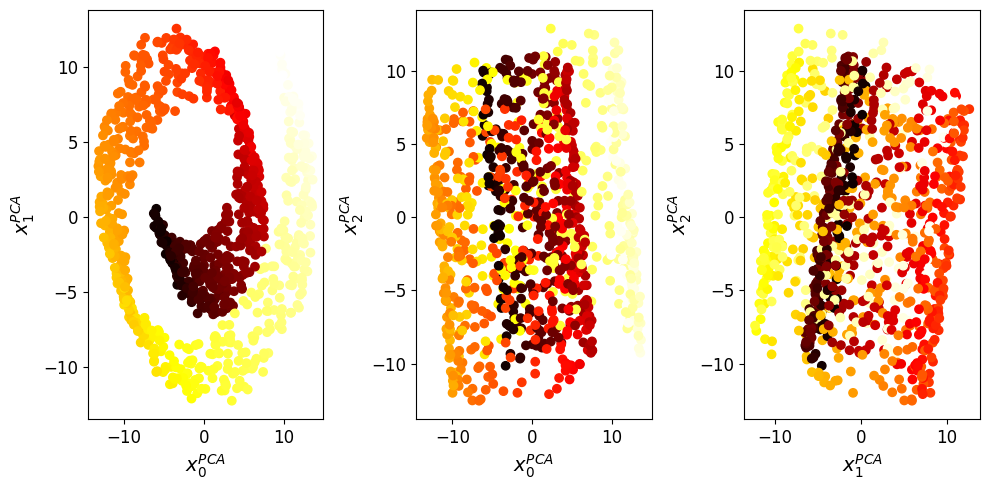

In [88]:
fig, axs = plt.subplots(1,3)

for ax,(i,j) in zip(axs.flatten(),[(0,1),(0,2),(1,2)]):
    ax.scatter(X_pca[:,i], X_pca[:,j],c=z,cmap=plt.cm.hot)
    ax.set_xlabel('$x^{PCA}_{'+str(i)+'}$')
    ax.set_ylabel('$x^{PCA}_{'+str(j)+'}$')
fig.set_size_inches(10,5)
fig.tight_layout()
plt.show()

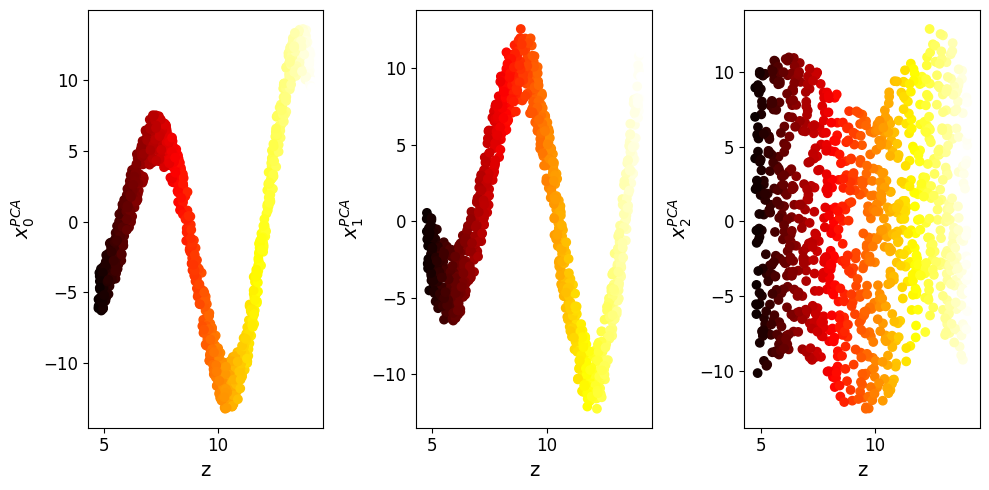

In [89]:
fig, axs = plt.subplots(1,3)

for ax,i in zip(axs.flatten(),[0, 1,2]):
    ax.scatter(z, X_pca[:,i], c=z,  cmap=plt.cm.hot)
    ax.set_ylabel('$x^{PCA}_{'+str(i)+'}$')
    ax.set_xlabel('z')
fig.set_size_inches(10,5)
fig.tight_layout()
plt.show()

### Manifold Learning

Here, we could think that the best projection will be the one that *unrolls* the data:

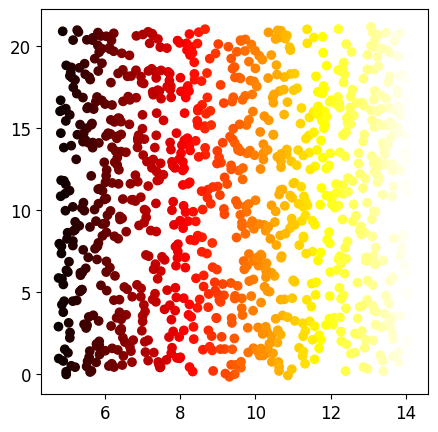

In [90]:
plt.figure(figsize=(5,5))

plt.scatter(z, X[:,1], c=z,  cmap=plt.cm.hot)

To learn these **embedded** spaces is **Manifold Learning**.

A simple method, which we won't detail here is **Locally Linear Embedding**. Very briefly, LLE finds for each instance the `n_neighbors` closer instances and utilizes them to fit a linear hiperplane of dimension `n_components`. Then, the instance is projected in this plance.

Let's see how it looks

In [91]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

In [92]:
print(X.shape, X_reduced.shape)

(1000, 3) (1000, 2)


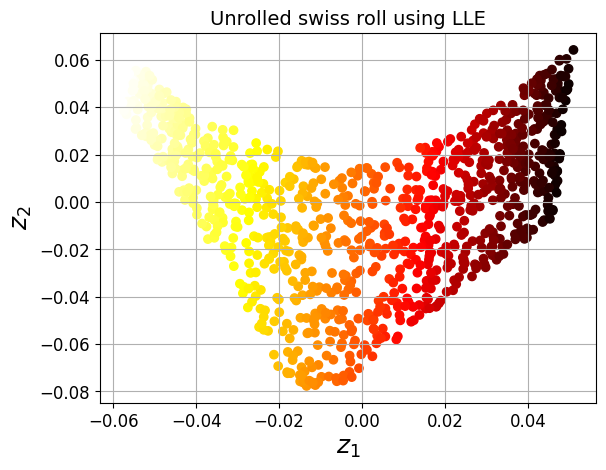

In [93]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=z, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
# plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

Much better!

### Data Compression

Let's see use dimensionality reduction for compression using a larger dataset, the MNIST:

In [94]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
t = mnist["target"]

In [97]:

### from https://github.com/ageron/handson-ml3/tree/main
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

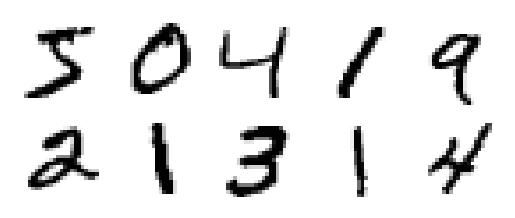

In [98]:
plot_digits(X[:10])

Each image consists of 784 pixels. We can reduce the dimensionality using PCA and try to inspect the reconstruction error:

In [99]:
pca = PCA(n_components=150)

X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

In [100]:
print(X.shape, X_reduced.shape, X_recovered.shape)

(70000, 784) (70000, 150) (70000, 784)


Text(0.5, 1.0, 'Compressed')

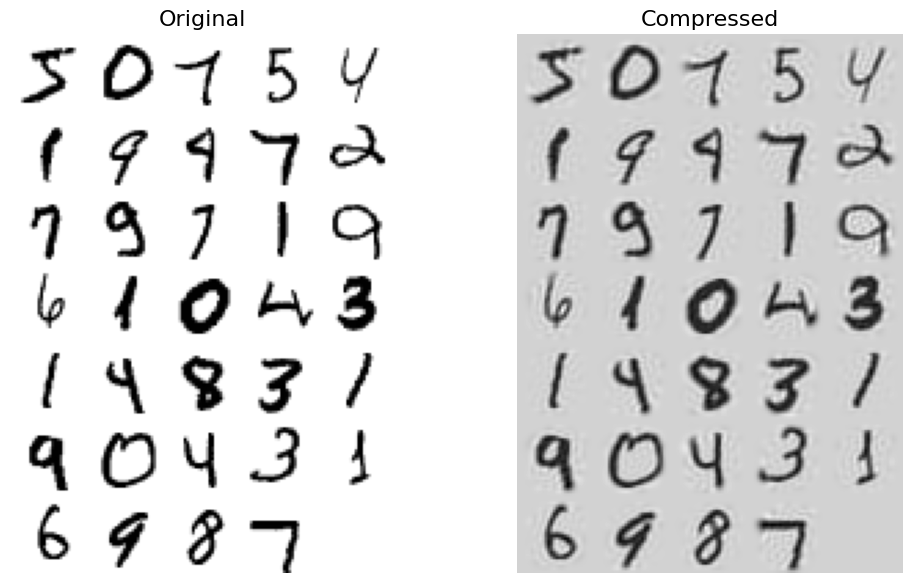

In [101]:
plt.figure(figsize=(12, 7))
plt.subplot(121)
plot_digits(X[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

How do we select the number of dimensions?

If we're not sure about what dimensionality should we impose, we can plot the cumulative sum of the explained variance ratio to see how much information is lost. If all features are used, it should be 1

In [102]:
pca = PCA()
pca.fit(X) #fit without reducing dimensionality

PCA()

In [103]:
pca.explained_variance_ratio_[:10]

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ])

In [104]:
cumsum = np.cumsum(pca.explained_variance_ratio_) #this tells us how much information is retained if we stop at each dimension

In [105]:
len(pca.explained_variance_ratio_)

784

In [106]:
cumsum[100]

0.9159433444885067

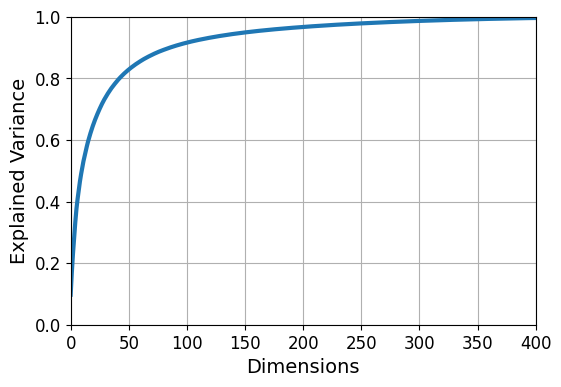

In [107]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])

plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")

plt.grid(True)
plt.show()

We can set an (arbitrary) variance threshold to decide the necessary number of components:

In [108]:
d = np.argmax(cumsum >= 0.95) + 1
print(d)

154


We keep 95% of the variance:

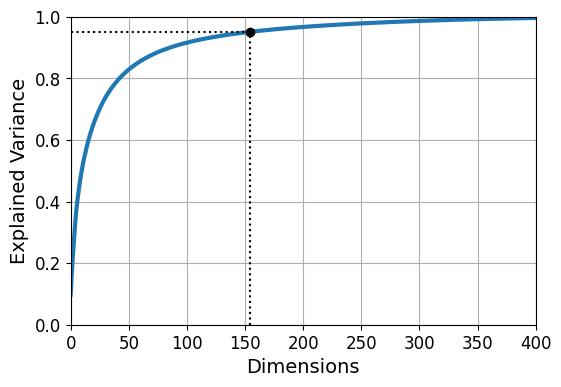

In [109]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])

plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")

plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")


plt.grid(True)
plt.show()

### Visualization with PCs

Now the dimensionality is reduced, but still we're in a high-dimensional space.

Can we try to interpret the different PCs? Since each PC is a linear combination of feature space coordinates, we can reshape and plot as images (this could be unpleasant if you have trypophobia)


In [112]:
npc = 100

ncolumns = 10
nrows = npc // ncolumns

trypophobia = True
if not trypophobia:

    # Add extra row, if necessary
    if npc % ncolumns:
        nrows += 1

    fig, axs = plt.subplots(nrows, ncolumns, figsize=(16, 2*nrows))

    for i, ax in zip(range(npc), axs.flatten()):
        pci_reshaped = pca.components_[i].reshape(28,28)
        ax.imshow(pci_reshaped, cmap='gray_r')
        ax.axis('off')

In [113]:
len(pca.components_[0])

784

We can check the average number, which is fairly meaningless...

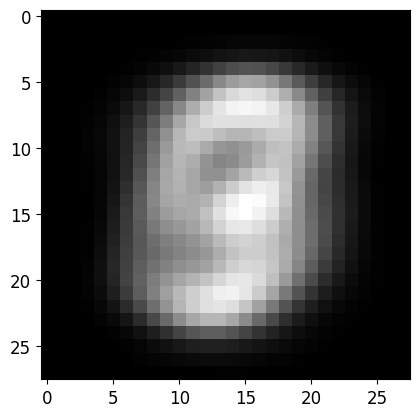

In [114]:
plt.imshow(pca.mean_.reshape(28, 28), cmap='gray')

### Preprocessing before Classification or Clustering

Sometimes, dimensionality reduction helps to reduce noise and group similar instances. Thus, it can be a useful preprocessing tool before training a classifying or a clustering / density estimation model.

Let's see:

In [115]:
pca = PCA(n_components=2, random_state=42)
X_reduced_pca = pca.fit_transform(X)

In [116]:
#custom CMAP
from matplotlib import cm
cmap = cm.get_cmap('jet', 10) 

/tmp/ipykernel_7520/215035421.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 10)


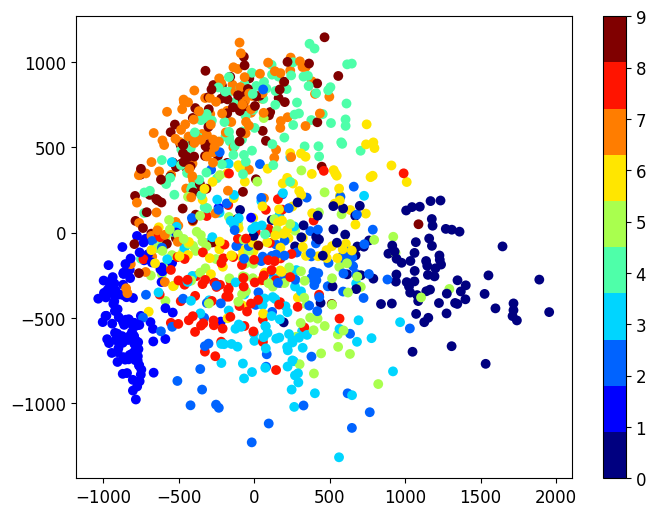

In [117]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
scat = ax.scatter(*X_reduced_pca[:1000].T, c=t[:1000], s=50, 
                  edgecolors='None', alpha=1, cmap=cmap)
fig.colorbar(scat)

We see how some digits are split (0s and 1s are very separate) while others are grouped together (6s and 8s). This is of course a very agressive 784 $\to$ 2 reduction.

### tSNE

A different and very popular manifold learnin technique is **t-Distributed Stochastic Neighbor Embedding** or tSNE. It's great for visualization since it learns a non-linear mapping that tends to group similar instances and separate different ones based on a notion of distance. It is however stochastic, so care should be taken if used as preprocessing technique.

In [118]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X[:1000])#fit a subset to reduce computing time

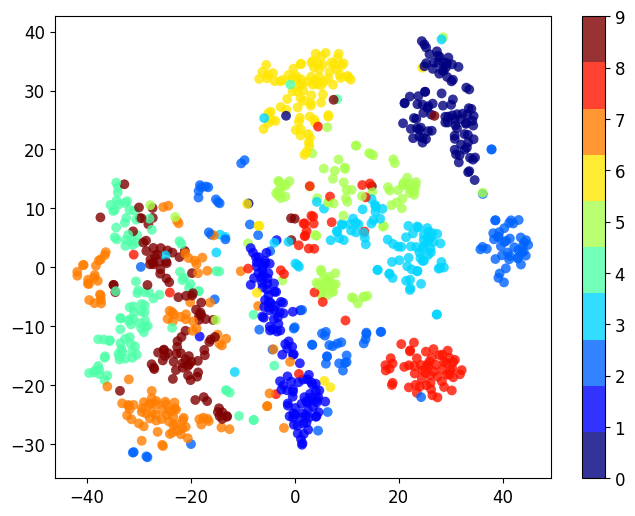

In [119]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
scat = ax.scatter(*X_reduced_tsne.T, c=t[:1000], s=50, cmap=cmap, 
                  edgecolors='None', alpha=0.8)
fig.colorbar(scat)

Now in 3D!

In [120]:
tsne = TSNE(n_components=3, random_state=42)
X_reduced_tsne_3d = tsne.fit_transform(X[:1000])#fit a subset to reduce computing time

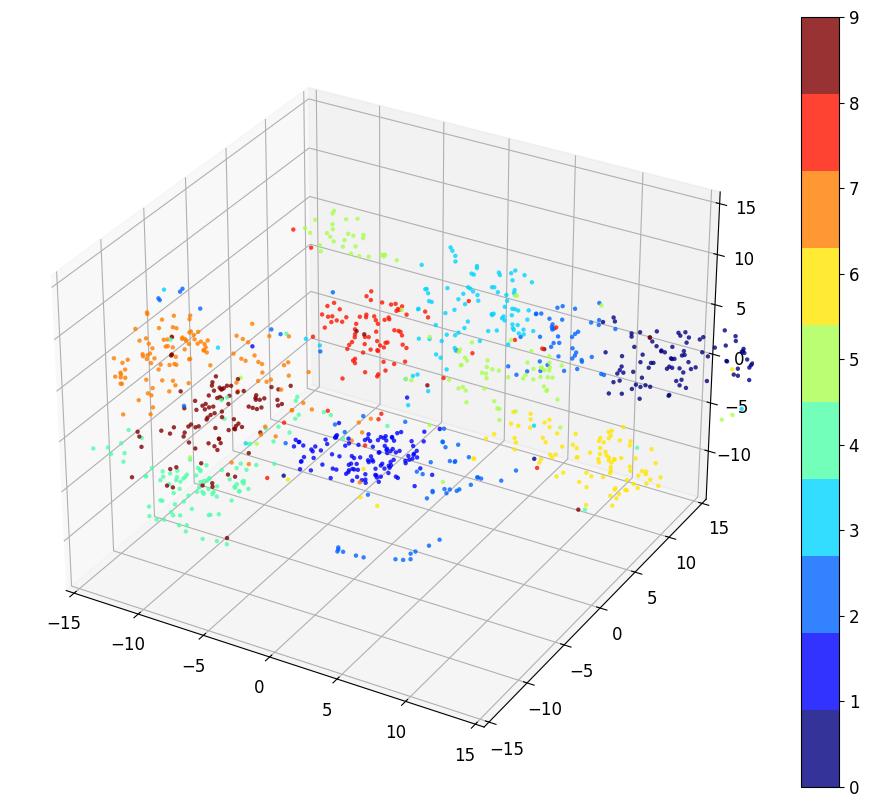

In [121]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')

scat = ax.scatter(*X_reduced_tsne_3d.T, c=t[:1000], s=10, cmap=cmap, 
                  edgecolors='None', alpha=0.8)

ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
fig.colorbar(scat)

Now we could in principle train a classifier using this smaller feature space!

## Exercise: Semi-supervised classification and latent space clustering

A usual problem is we do not have enough labelled data. Thus, we can try to train a classifier to label data for us. However, training on a large feature space with few datapoints can be hard. Dimensionality reduction helps with that.

Using the MNIST dataset and `sklearn` implementations, use PCA or tSNE to define a lower dimensional representation, and train a classifier on a set of 50 random samples. Use the classifier on the rest of the imagines and assess the quality of the labelling. Explore the impact of the number of components chosen.

Additionally, perform K-Means and Gaussian Mixtures on the latent eigenspace. Interpret it in terms of the labels.

In [ ]:
###SOLUTION_START
###SOLUTION_STOP